#### Real-Time Data Analysis of Brownville Food Pantry For Deer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing the data 

#### The dataset appears to be a time series dataset that tracks the amount of food consumed by deer at a food pantry over a certain period of time.

In [2]:
myDF = pd.read_csv("Brownville Food Pantry For Deer.csv")
print("Shape of DataFrame =", myDF.shape)
print("Columns:", list(myDF))
myDF.head()

Shape of DataFrame = (500, 7)
Columns: ['date of feeding', 'total pounds of apples', 'total pounds of oats', 'total pounds of acorns', 'ambient temperature at feeding', 'total deer waiting to eat', 'predominant animal spotted at feeding']


,date of feeding,total pounds of apples,total pounds of oats,total pounds of acorns,ambient temperature at feeding,total deer waiting to eat,predominant animal spotted at feeding
0,2023-02-08,125,457,269.63,5,0,wolves
1,2023-01-19,167,699,NaN,-17,10,squirells
2,2022-09-10,233,386,213.59,-8,6,birds
3,2022-11-13,119,744,170.51,20,11,squirells
4,2022-08-24,213,442,212.67,20,10,moose


## Data Wrangling

In [3]:
myDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   date of feeding                        495 non-null    object
 1   total pounds of apples                 497 non-null    object
 2   total pounds of oats                   498 non-null    object
 3   total pounds of acorns                 495 non-null    object
 4   ambient temperature at feeding         497 non-null    object
 5   total deer waiting to eat              498 non-null    object
 6   predominant animal spotted at feeding  490 non-null    object
dtypes: object(7)
memory usage: 27.5+ KB


In [4]:
myDF.isna().sum()

date of feeding                           5
total pounds of apples                    3
total pounds of oats                      2
total pounds of acorns                    5
ambient temperature at feeding            3
total deer waiting to eat                 2
predominant animal spotted at feeding    10
dtype: int64

In [5]:
pd.isna(myDF)

,date of feeding,total pounds of apples,total pounds of oats,total pounds of acorns,ambient temperature at feeding,total deer waiting to eat,predominant animal spotted at feeding
0,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False


In [6]:
noMisDF = myDF.replace(to_replace = "Missing", value = None)
noMisDF

,date of feeding,total pounds of apples,total pounds of oats,total pounds of acorns,ambient temperature at feeding,total deer waiting to eat,predominant animal spotted at feeding
0,2023-02-08,125,457,269.63,5,0,wolves
1,2023-01-19,167,699,NaN,-17,10,squirells
2,2022-09-10,233,386,213.59,-8,6,birds
3,2022-11-13,119,744,170.51,20,11,squirells
4,2022-08-24,213,442,212.67,20,10,moose
...,...,...,...,...,...,...,...
495,2022-11-25,137,697,228.15,18,18,wolves
496,2022-12-24,131,883,489.76,-7,10,squirells
497,2023-02-11,179,526,413.68,20,None,squirells
498,2023-02-11,214,188,424.14,17,17,moose


In [7]:
noMissingDF = noMisDF.replace(to_replace = "None", value = None)
noMissingDF

,date of feeding,total pounds of apples,total pounds of oats,total pounds of acorns,ambient temperature at feeding,total deer waiting to eat,predominant animal spotted at feeding
0,2023-02-08,125,457,269.63,5,0,wolves
1,2023-01-19,167,699,NaN,-17,10,squirells
2,2022-09-10,233,386,213.59,-8,6,birds
3,2022-11-13,119,744,170.51,20,11,squirells
4,2022-08-24,213,442,212.67,20,10,moose
...,...,...,...,...,...,...,...
495,2022-11-25,137,697,228.15,18,18,wolves
496,2022-12-24,131,883,489.76,-7,10,squirells
497,2023-02-11,179,526,413.68,20,None,squirells
498,2023-02-11,214,188,424.14,17,17,moose


In [8]:
noMissingDF = noMissingDF.replace(to_replace = "nan", value = None)
noMissingDF

,date of feeding,total pounds of apples,total pounds of oats,total pounds of acorns,ambient temperature at feeding,total deer waiting to eat,predominant animal spotted at feeding
0,2023-02-08,125,457,269.63,5,0,wolves
1,2023-01-19,167,699,NaN,-17,10,squirells
2,2022-09-10,233,386,213.59,-8,6,birds
3,2022-11-13,119,744,170.51,20,11,squirells
4,2022-08-24,213,442,212.67,20,10,moose
...,...,...,...,...,...,...,...
495,2022-11-25,137,697,228.15,18,18,wolves
496,2022-12-24,131,883,489.76,-7,10,squirells
497,2023-02-11,179,526,413.68,20,None,squirells
498,2023-02-11,214,188,424.14,17,17,moose


In [9]:
noMissingDF.isna().sum()

date of feeding                          17
total pounds of apples                   11
total pounds of oats                     10
total pounds of acorns                   12
ambient temperature at feeding           17
total deer waiting to eat                17
predominant animal spotted at feeding    23
dtype: int64

In [10]:
noMissingDataDF = noMissingDF.dropna()
noMissingDataDF

,date of feeding,total pounds of apples,total pounds of oats,total pounds of acorns,ambient temperature at feeding,total deer waiting to eat,predominant animal spotted at feeding
0,2023-02-08,125,457,269.63,5,0,wolves
2,2022-09-10,233,386,213.59,-8,6,birds
3,2022-11-13,119,744,170.51,20,11,squirells
4,2022-08-24,213,442,212.67,20,10,moose
5,2022-12-15,121,823,353.78,14,19,wolves
...,...,...,...,...,...,...,...
494,2022-11-25,203,189,231.0,0,3,moose
495,2022-11-25,137,697,228.15,18,18,wolves
496,2022-12-24,131,883,489.76,-7,10,squirells
498,2023-02-11,214,188,424.14,17,17,moose


In [11]:
noMissingDataDF['date of feeding'] = pd.to_datetime(noMissingDataDF['date of feeding'], errors='coerce')
noMissingDataDF['total pounds of apples'] = pd.to_numeric(noMissingDataDF['total pounds of apples'], errors='coerce')
noMissingDataDF['total pounds of oats'] = pd.to_numeric(noMissingDataDF['total pounds of oats'], errors='coerce')
noMissingDataDF['total pounds of acorns'] = pd.to_numeric(noMissingDataDF['total pounds of acorns'], errors='coerce')
noMissingDataDF['ambient temperature at feeding'] = pd.to_numeric(noMissingDataDF['ambient temperature at feeding'], errors='coerce')
noMissingDataDF['total deer waiting to eat'] = pd.to_numeric(noMissingDataDF['total deer waiting to eat'], errors='coerce')
noMissingDataDF['predominant animal spotted at feeding'] = noMissingDataDF['predominant animal spotted at feeding'].replace(['0', '1'], 'no animals')
noMissingDataDF['predominant animal spotted at feeding'] = noMissingDataDF['predominant animal spotted at feeding'].replace(' ', 'no animals')


In [12]:
pd.set_option('display.max_rows', len(noMissingDataDF))

In [13]:
noMissingDataDF = noMissingDataDF.dropna()
noMissingDataDF

,date of feeding,total pounds of apples,total pounds of oats,total pounds of acorns,ambient temperature at feeding,total deer waiting to eat,predominant animal spotted at feeding
0,2023-02-08,125.0,457.0,269.63,5.0,0.0,wolves
2,2022-09-10,233.0,386.0,213.59,-8.0,6.0,birds
3,2022-11-13,119.0,744.0,170.51,20.0,11.0,squirells
4,2022-08-24,213.0,442.0,212.67,20.0,10.0,moose
5,2022-12-15,121.0,823.0,353.78,14.0,19.0,wolves
6,2022-08-22,183.0,372.0,3.30,-17.0,3.0,birds
9,2022-12-27,220.0,31.0,103.69,-19.0,16.0,squirells
10,2022-11-20,242.0,185.0,469.44,7.0,19.0,moose
11,2023-01-24,169.0,935.0,102.82,-16.0,6.0,wolves
12,2022-10-29,116.0,799.0,144.23,-1.0,15.0,squirells


In [14]:
noMissingDataDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date of feeding                        381 non-null    datetime64[ns]
 1   total pounds of apples                 381 non-null    float64       
 2   total pounds of oats                   381 non-null    float64       
 3   total pounds of acorns                 381 non-null    float64       
 4   ambient temperature at feeding         381 non-null    float64       
 5   total deer waiting to eat              381 non-null    float64       
 6   predominant animal spotted at feeding  381 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 23.8+ KB


In [15]:
noMissingDataDF.describe()

,total pounds of apples,total pounds of oats,total pounds of acorns,ambient temperature at feeding,total deer waiting to eat
count,381.000000,381.000000,381.000000,381.000000,381.000000
mean,169.737533,504.131234,234.144882,-0.364829,9.246719
std,46.376144,288.624977,149.570883,11.510440,5.926481
min,0.000000,0.000000,0.000000,-20.000000,0.000000
25%,138.000000,238.000000,107.130000,-10.000000,4.000000
50%,173.000000,516.000000,227.430000,-1.000000,9.000000
75%,204.000000,745.000000,353.780000,9.000000,14.000000
max,291.000000,1000.000000,499.350000,20.000000,19.000000


## Scatter Plots

### Scatter Plot 1

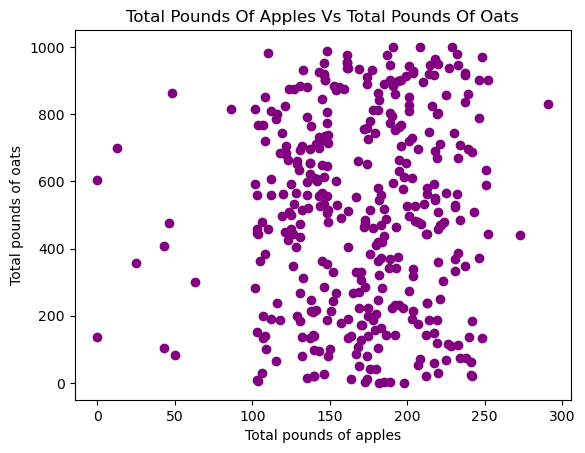

In [16]:
plt.scatter(noMissingDataDF['total pounds of apples'],noMissingDataDF['total pounds of oats'],c='purple')
plt.title('Total Pounds Of Apples Vs Total Pounds Of Oats')
plt.xlabel('Total pounds of apples')
plt.ylabel('Total pounds of oats')
plt.show()

### Scatter Plot 2

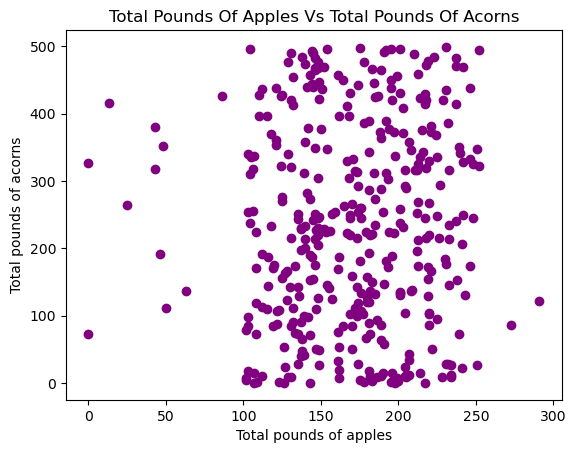

In [17]:
plt.scatter(noMissingDataDF['total pounds of apples'],noMissingDataDF['total pounds of acorns'],c='purple')
plt.title('Total Pounds Of Apples Vs Total Pounds Of Acorns')
plt.xlabel('Total pounds of apples')
plt.ylabel('Total pounds of acorns')
plt.show()

### Scatter Plot 3

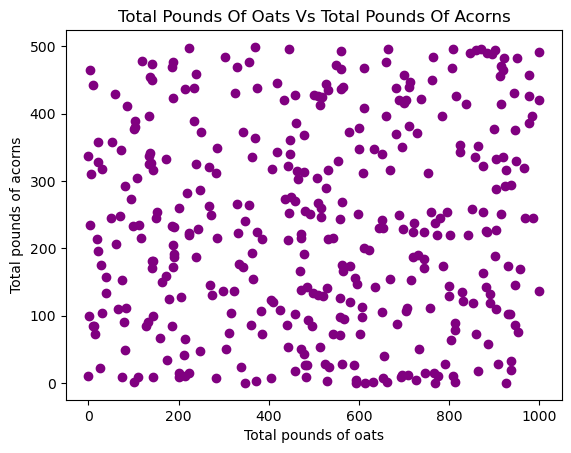

In [18]:
plt.scatter(noMissingDataDF['total pounds of oats'],noMissingDataDF['total pounds of acorns'],c='purple')
plt.title('Total Pounds Of Oats Vs Total Pounds Of Acorns')
plt.xlabel('Total pounds of oats')
plt.ylabel('Total pounds of acorns')
plt.show()

### Scatter Plot 4

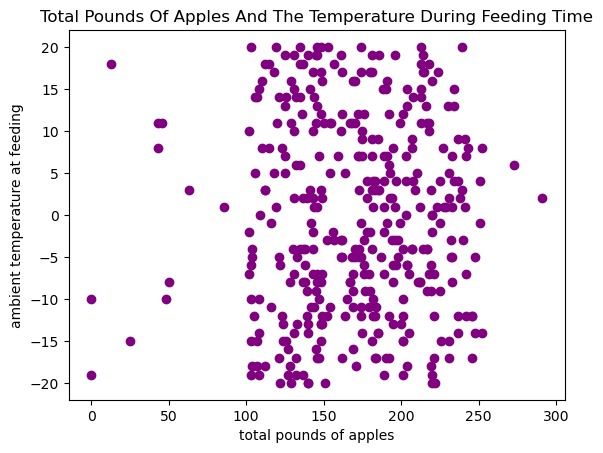

In [19]:
plt.scatter(noMissingDataDF['total pounds of apples'],noMissingDataDF['ambient temperature at feeding'],c='purple')
plt.title('Total Pounds Of Apples And The Temperature During Feeding Time')
plt.xlabel('total pounds of apples')
plt.ylabel('ambient temperature at feeding')
plt.show()

### Scatter Plot 5

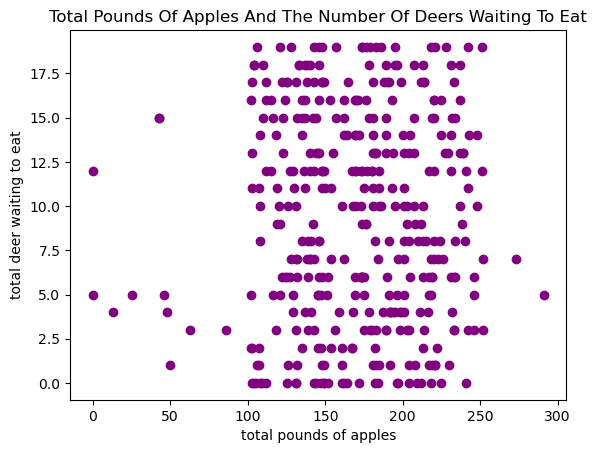

In [20]:
plt.scatter(noMissingDataDF['total pounds of apples'],noMissingDataDF['total deer waiting to eat'],c='purple')
plt.title('Total Pounds Of Apples And The Number Of Deers Waiting To Eat')
plt.xlabel('total pounds of apples')
plt.ylabel('total deer waiting to eat')
plt.show()

### Scatter Plot 6

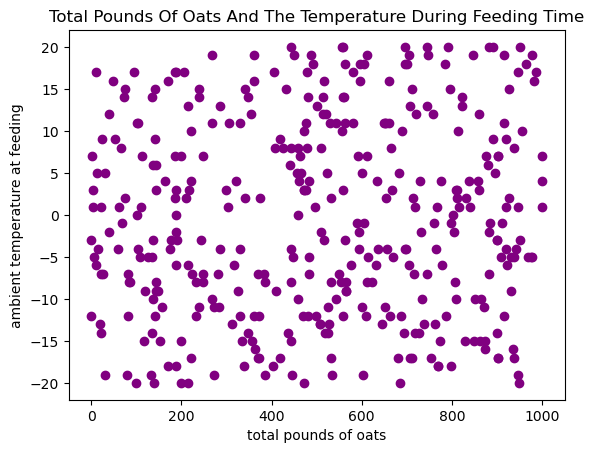

In [21]:
plt.scatter(noMissingDataDF['total pounds of oats'],noMissingDataDF['ambient temperature at feeding'],c='purple')
plt.title('Total Pounds Of Oats And The Temperature During Feeding Time')
plt.xlabel('total pounds of oats')
plt.ylabel('ambient temperature at feeding')
plt.show()

### Scatter Plot 7

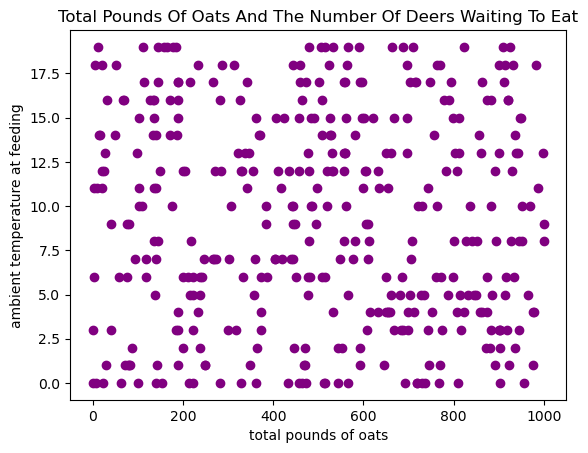

In [22]:
plt.scatter(noMissingDataDF['total pounds of oats'],noMissingDataDF['total deer waiting to eat'],c='purple')
plt.title('Total Pounds Of Oats And The Number Of Deers Waiting To Eat')
plt.xlabel('total pounds of oats')
plt.ylabel('ambient temperature at feeding')
plt.show()

### Scatter Plot 8

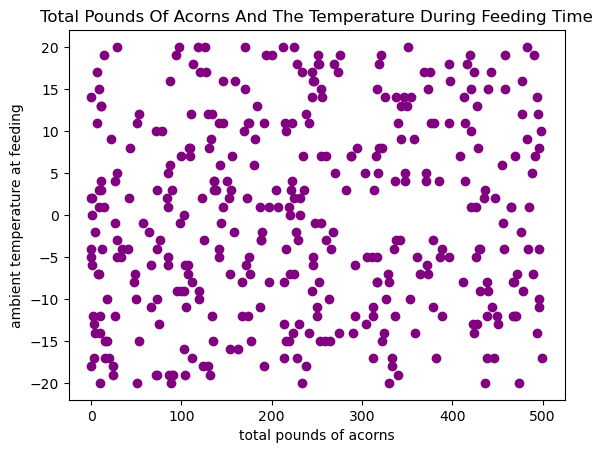

In [23]:
plt.scatter(noMissingDataDF['total pounds of acorns'],noMissingDataDF['ambient temperature at feeding'],c='purple')
plt.title('Total Pounds Of Acorns And The Temperature During Feeding Time')
plt.xlabel('total pounds of acorns')
plt.ylabel('ambient temperature at feeding')
plt.show()

### Scatter Plot 9

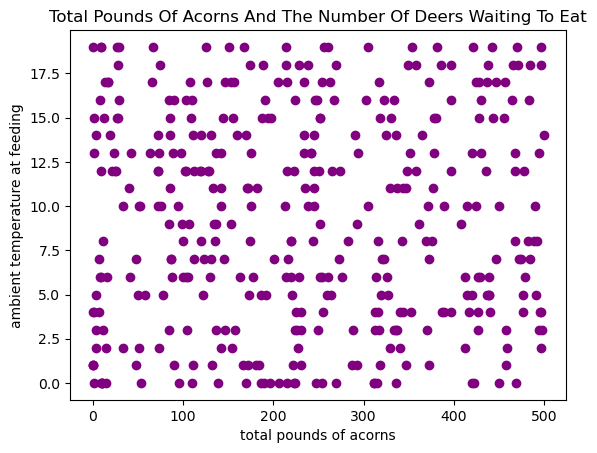

In [24]:
plt.scatter(noMissingDataDF['total pounds of acorns'],noMissingDataDF['total deer waiting to eat'],c='purple')
plt.title('Total Pounds Of Acorns And The Number Of Deers Waiting To Eat')
plt.xlabel('total pounds of acorns')
plt.ylabel('ambient temperature at feeding')
plt.show()

### Scatter Plot 10

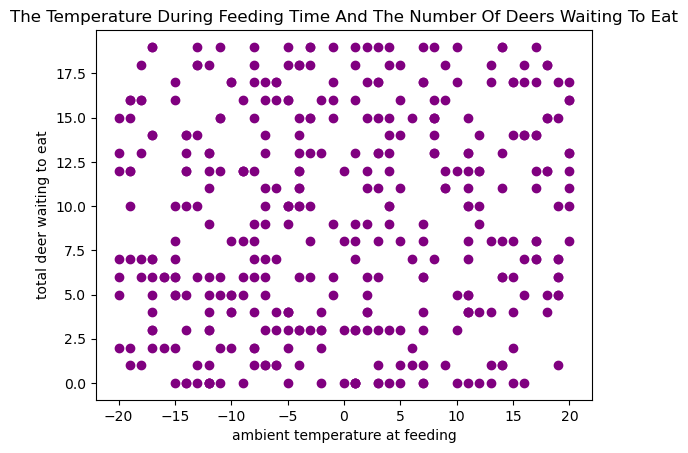

In [25]:
plt.scatter(noMissingDataDF['ambient temperature at feeding'],noMissingDataDF['total deer waiting to eat'],c='purple')
plt.title('The Temperature During Feeding Time And The Number Of Deers Waiting To Eat')
plt.xlabel('ambient temperature at feeding')
plt.ylabel('total deer waiting to eat')
plt.show()

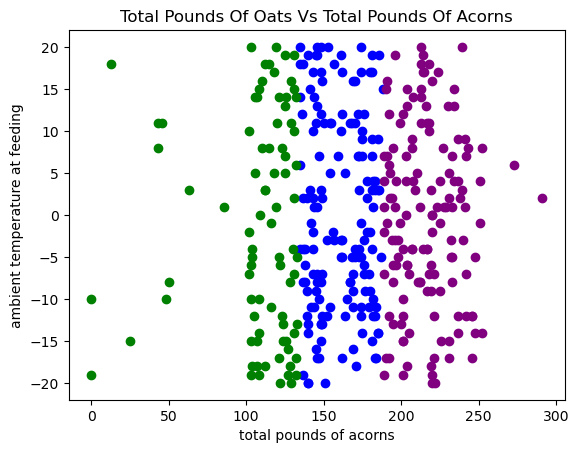

In [26]:

from sklearn.cluster import KMeans

X = noMissingDataDF[['total pounds of apples', 'ambient temperature at feeding']]

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

labels = kmeans.labels_

plt.scatter(X[labels==0]['total pounds of apples'], X[labels==0]['ambient temperature at feeding'], color='blue')
plt.scatter(X[labels==1]['total pounds of apples'], X[labels==1]['ambient temperature at feeding'], color='purple')
plt.scatter(X[labels==2]['total pounds of apples'], X[labels==2]['ambient temperature at feeding'], color='green')

plt.title('Total Pounds Of Oats Vs Total Pounds Of Acorns')
plt.xlabel('total pounds of acorns')
plt.ylabel('ambient temperature at feeding')
plt.show()
